In [9]:
from LogisticRegression import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
## convert text file into matrix
def file2matrix(filename , header = True, delimeter="\t", index_y = None):
    """
    Takes a .txt file and returns a list of column names,a matrix of features and
    a vectore of y in case of having a target variable.
    """    
    fr = open(filename)
    colName = []
    if header == True:
        colName = list(fr.readline().strip().split(delimeter))
    numberOfLines = len(fr.readlines())
    fr = open(filename)
    numberOfX = len(fr.readline().split(delimeter)) 
    if index_y is not None:
        numberOfX = len(fr.readline().split(delimeter))-1                   
    returnMatX = np.zeros((numberOfLines,numberOfX))
    classLabelVector = []
    fr = open(filename)
    firstRow = 0
    if header == True:
        firstRow = 1
    index = 0
    for line in fr.readlines()[firstRow:]:
        line = line.strip()                            
        listFromLine = line.split(delimeter)
        if index_y is not None:
            classLabelVector.append(listFromLine[index_y])
            listFromLine.pop(index_y)
        fltListFromLine = list(map(lambda x: float(x) if x!="" else np.nan, listFromLine))                                 
        returnMatX[index,:] = fltListFromLine        
        index += 1
    return colName, returnMatX, classLabelVector

In [3]:
filename = "testSet.txt"
colName, returnMatX, classLabelVector = file2matrix(filename, header = True, index_y = -1)
y = [int(x) for x in classLabelVector]
X = returnMatX

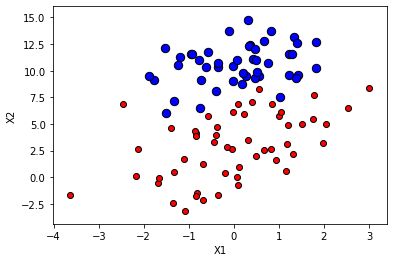

In [4]:
for x1, x2, target in zip(X[:,0], X[:,1], np.array(y)):
    if target == 0:
        plt.scatter(x1, x2, s = 70, color = "blue", edgecolors="k")
    else:
        plt.scatter(x1, x2, color = "red", edgecolors="k") 

plt.xlabel("X1")
plt.ylabel("X2");

In [16]:
## confusion matrix plot
def plot_cm(y, y_est):
    cm = confusion_matrix(y, y_est);
    accuracy = np.round(100*cm.diagonal().sum()/cm.sum(),2); error_rate = np.round(100-accuracy,2)
    plt.imshow(cm, cmap='binary', interpolation='None')
    plt.colorbar()
    #plt.xticks(range(C)); plt.yticks(range(C));
    plt.xlabel('Predicted class'); plt.ylabel('Actual class');
    plt.title('Confusion matrix (Accuracy: {0}%, Error Rate: {1}%)'.format(accuracy, error_rate));

loss: 0.2767
loss: 0.0784
loss: 0.0784
loss: 0.0784
loss: 0.0784
loss: 0.0784
loss: 0.0784
loss: 0.0784
loss: 0.0784
loss: 0.0784


array([[13,  2],
       [ 0, 18]], dtype=int64)

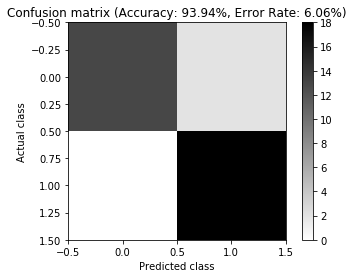

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
model = LogisticRegression(verbose=True)
model.fit(X_train, y_train, optimizer = "newton")
pred = model.prediction(X_test)
plot_cm(y_test,pred)
confusion_matrix(y_test, pred)
